<a href="https://colab.research.google.com/github/NandanaSasidharan908/SCT_DS_4/blob/main/skillcraft_task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import zipfile

In [ ]:
zip_file = "/content/Road Accident Data.csv.zip"
with zipfile.ZipFile(zip_file, 'r') as z:
    file_name = z.namelist()[0]   # get CSV inside ZIP
    df = pd.read_csv(z.open(file_name))


In [ ]:
print("Shape of data:", df.shape)
print(df.head())


Shape of data: (307973, 21)
  Accident_Index Accident Date Day_of_Week          Junction_Control  \
0  200901BS70001      1/1/2021    Thursday  Give way or uncontrolled   
1  200901BS70002      1/5/2021      Monday  Give way or uncontrolled   
2  200901BS70003      1/4/2021      Sunday  Give way or uncontrolled   
3  200901BS70004      1/5/2021      Monday       Auto traffic signal   
4  200901BS70005      1/6/2021     Tuesday       Auto traffic signal   

           Junction_Detail Accident_Severity   Latitude  \
0  T or staggered junction           Serious  51.512273   
1               Crossroads           Serious  51.514399   
2  T or staggered junction            Slight  51.486668   
3  T or staggered junction           Serious  51.507804   
4               Crossroads           Serious  51.482076   

        Light_Conditions Local_Authority_(District) Carriageway_Hazards  ...  \
0               Daylight     Kensington and Chelsea                 NaN  ...   
1               Daylight

In [ ]:
# Check available columns
print("Columns in dataset:", df.columns.tolist())

# Use alternative names depending on dataset
weather_col = None
road_col = None
time_col = None

for col in df.columns:
    if "weather" in col.lower():
        weather_col = col
    if "road" in col.lower():
        road_col = col
    if "time" in col.lower():
        time_col = col

print("Detected columns -> Weather:", weather_col, ", Road:", road_col, ", Time:", time_col)

# Clean missing values
if weather_col:
    df[weather_col] = df[weather_col].fillna(df[weather_col].mode()[0])
if road_col:
    df[road_col] = df[road_col].fillna(df[road_col].mode()[0])

# Extract hour from time
if time_col:
    df['Hour'] = pd.to_datetime(df[time_col], errors='coerce').dt.hour


Columns in dataset: ['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions', 'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type']
Detected columns -> Weather: Weather_Conditions , Road: Road_Type , Time: Time


/tmp/ipython-input-4276793181.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df[time_col], errors='coerce').dt.hour


/tmp/ipython-input-4106434630.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=weather_col, order=df[weather_col].value_counts().index, palette="viridis")


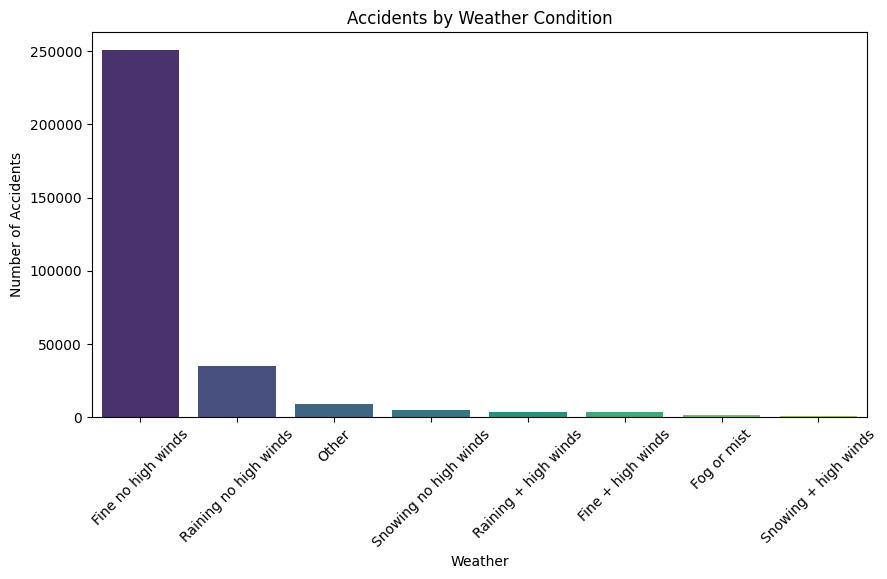

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x=weather_col, order=df[weather_col].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Accidents by Weather Condition")
plt.xlabel("Weather")
plt.ylabel("Number of Accidents")
plt.show()


/tmp/ipython-input-1146000928.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=road_col, order=df[road_col].value_counts().index, palette="Set2")


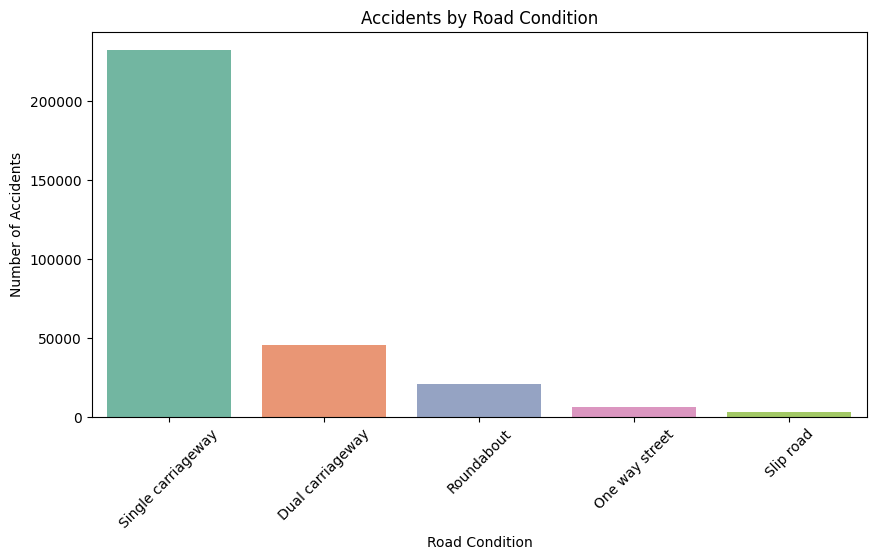

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x=road_col, order=df[road_col].value_counts().index, palette="Set2")
plt.xticks(rotation=45)
plt.title("Accidents by Road Condition")
plt.xlabel("Road Condition")
plt.ylabel("Number of Accidents")
plt.show()


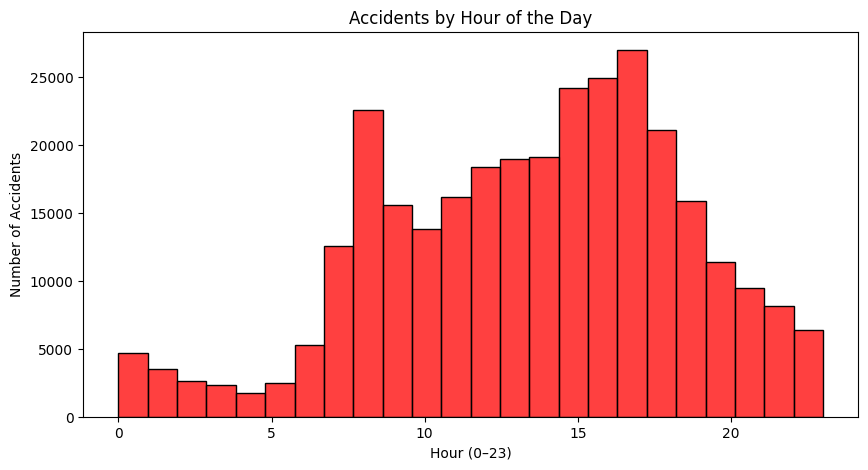

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['Hour'], bins=24, kde=False, color="red")
plt.title("Accidents by Hour of the Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Number of Accidents")
plt.show()


In [ ]:
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=6)

    for _, row in df.dropna(subset=['Latitude','Longitude']).iterrows():
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=2,
            color="red",
            fill=True,
            fill_color="red"
        ).add_to(m)

    m.save("accident_hotspots.html")
    print("✅ Accident hotspot map saved as accident_hotspots.html")


✅ Accident hotspot map saved as accident_hotspots.html


In [ ]:
if 'Cause' in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, y='Cause', order=df['Cause'].value_counts().index[:10], palette="coolwarm")
    plt.title("Top 10 Contributing Factors of Accidents")
    plt.xlabel("Number of Accidents")
    plt.ylabel("Cause")
    plt.show()
